# A FAIRE (LOUIS) : APPLIQUER TOUS LES TRAITEMENTS EGALEMENT SUR LE JEU DE DONNEES TEST

# Chargement des bibliothèques

In [1]:
# Classique
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import os

# Import Yoann
import sys
import re
import string
!{sys.executable} -m pip install spacy
#import pandas as pd 
import re
import spacy
# !{sys.executable} -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")


# import françois

from better_profanity import profanity # importation du package

# géométrie/algèbre
import sympy
from sympy import symbols, Eq, solve

# NLP
#import spacy
#import re
#import string

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Editeur
import warnings
warnings.filterwarnings('ignore')

# Chargement des données

In [2]:
url1 = 'https://raw.githubusercontent.com/Francois-lenne/Big-data-SIAD/main/train.csv' # le dataset est stocké dans un repo github afin d'avoir un lien dur sur la base
train = pd.read_csv(url1, sep=',') # lecture du dataframe 
train = train.sample(1000).reset_index(drop=True)
print(train.head())

     id             keyword                        location  \
0  8443            screamed                             NaN   
1  2939              danger                             NaN   
2  7213  natural%20disaster  Oneonta, NY/ Staten Island, NY   
3  5526           flattened                    new york, ny   
4   132            accident                             NaN   

                                                text  target  
0  I slammed my phone to the ground and then scre...       0  
1  The girl that I wanna save is like a danger to...       0  
2  its only getting colder and colder and faster ...       1  
3  who said this? Yosemite Sam or Drumpf? ÛÏNobo...       0  
4     ???? it was an accident http://t.co/Oia5fxi4gM       0  


In [3]:
url2 = 'https://raw.githubusercontent.com/Francois-lenne/Big-data-SIAD/main/test.csv' # le dataset est stocké dans un repo github afin d'avoir un lien dur sur la base
test = pd.read_csv(url2, sep=',') # lecture du dataframe 
test = test.sample(200).reset_index(drop=True)
print(test.head())

     id     keyword       location  \
0  5360        fire     Wonderland   
1   101    accident            NaN   
2  4380  earthquake            NaN   
3  4037    disaster  NYC/LI/NJ/LHV   
4  8104     rescued         Canada   

                                                text  
0           When your likes your Fire IG selfie ????  
1  Just got to love burning your self on a damn c...  
2  5.3 #Earthquake in South Of Fiji Islands. #iPh...  
3  Not an electric debut for Severino but not a d...  
4  10-Month-Old Baby Girl was Rescued by Coastgua...  


# Analyse exploratoire

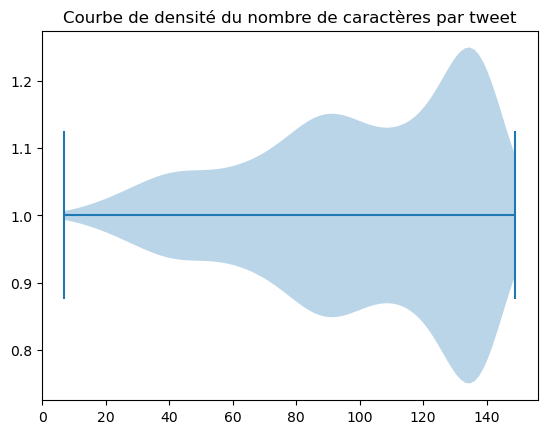

In [4]:
train['text_length'] = [len(text) for text in train['text']]
plt.violinplot(train['text_length'], vert = False)
plt.title('Courbe de densité du nombre de caractères par tweet')
plt.show()

In [5]:
train['keyword'].value_counts()

damage                   11
eyewitness               11
drowning                 10
mudslide                 10
riot                      9
                         ..
epicentre                 1
radiation%20emergency     1
threat                    1
collapsed                 1
explode                   1
Name: keyword, Length: 220, dtype: int64

In [6]:
train['location'].value_counts()

New York                          9
USA                               9
India                             7
UK                                6
Everywhere                        6
                                 ..
Milwaukee, WI                     1
50% Queanbeyan - 50% Sydney       1
#KaumElite;#F?VOR;#SMOFC          1
sitting on the fence, New York    1
Uruguay / Westeros / Gallifrey    1
Name: location, Length: 558, dtype: int64

# Extraction des parties des tweets


In [7]:
# Correction orthographique

# Conversion chiffres en texte

# Date

# Hashtag

# Liens hypertextes

# Contenu textuel

# Noms profils

# Enrichissement de la localisation

In [8]:
# Récupération des hashtag

def recupHashtag(text):
    reg = r"#(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
        ge = p.findall(text)
        ge_join = ' '.join(ge)
        return ge_join

def recupHashtagBinaire(text):
    rep = '0'
    reg = r"#(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
      rep = '1'
    return rep


In [9]:
def recupName(text):
    reg = r"@(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
        ge = p.findall(text)
        ge_join = ' '.join(ge)
        return ge_join

def recupNameBinaire(text):
    rep = '0'
    reg = r"@(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
      rep = '1'
    return rep
        


In [10]:
def recupDate(text):
    reg = r"([A-Za-z]{3})\s(\d{1,2}),\s(\d{4})"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
        ge = p.findall(text)
        return ge

def recupDateBinaire(text):
    rep = '0'
    reg = r"([A-Za-z]{3})\s(\d{1,2}),\s(\d{4})"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
      rep = '1'
    return rep
    


In [11]:
def getChemin(text):
    reg1 = r'(https?:\/\/[^\s]+)'
    reg2 = r'(https?)://([^:/]+)(?::(\d+))?(/[^?]*)?(\?[^#]*)?(#.*)?'
    p = re.compile(reg1)
    check = re.search(reg1,text)
    if check is not None:
        ge = p.findall(text)
        for val in ge:
            match = re.search(reg2,val)
            if match:
                rt = match.group(4)
            return rt

def getCheminBinaire(text):
    rep = '0'
    reg1 = r'(https?:\/\/[^\s]+)'
    p = re.compile(reg1)
    check = re.search(reg1,text)
    if check is not None:
      rep = '1'
    return rep

In [12]:
def getLocation(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            save.append(ent.text)
    return save

In [13]:
def getLocationBinaire(text):
    rep = "0"
    global nlp
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            rep = "1"
    return rep

In [14]:
def profanity(text):
    from better_profanity import profanity 
    check = profanity.contains_profanity(text)
    return(check)

In [15]:
def GPE(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
            save.append(ent.label_)
    if ("GPE" in save):
        GPE_exist = 1
    else:
        GPE_exist = 0
    return GPE_exist  

In [16]:
def NORP(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
            save.append(ent.label_)
    if ("NORP" in save):
        NORP_exist = 1
    else:
        NORP_exist = 0
    return NORP_exist   



In [17]:
def ORG(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
            save.append(ent.label_)
    if ("ORG" in save):
        ORG_exist = 1
    else:
        ORG_exist = 0
    return ORG_exist   



In [18]:
def DATE(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
            save.append(ent.label_)
    if ("DATE" in save):
        DATE_exist = 1
    else:
        DATE_exist = 0
    return DATE_exist   




In [19]:
def PERSON(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
            save.append(ent.label_)
    if ("PERSON" in save):
        PERSON_exist = 1
    else:
        PERSON_exist = 0
    return PERSON_exist   


In [20]:
def sentiment_tweet(tweet):
    from nltk.sentiment import SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    if sia.polarity_scores(tweet)["compound"] > 0:
        nltk_val = "positif"
    elif sia.polarity_scores(tweet)["compound"] < 0:
        nltk_val = "negative"
    else:
        nltk_val = "neutral"
    return nltk_val

In [21]:
train['hashtags'] = train['text'].apply(recupHashtag)
train['hashtags_b'] = train['text'].apply(recupHashtagBinaire)

train["sentiment_tweet"] = train["text"].apply(sentiment_tweet)

train["GPE_exist"] = train["text"].apply(GPE)

train["NORP_exist"] = train["text"].apply(NORP)

train["ORG_exist"] = train["text"].apply(ORG)

train["DATE_exist"] = train["text"].apply(DATE)

train["PERSON_exist"] = train["text"].apply(PERSON)

train["profanity"] = train["text"].apply(profanity)

train['names'] = train['text'].apply(recupName)
train['names_b'] = train['text'].apply(recupNameBinaire)

train['dates'] = train['text'].apply(recupDate)
train['dates_b'] = train['text'].apply(recupDateBinaire)

train['locations'] = train['text'].apply(getLocation)
train['locations_b'] = train['text'].apply(getLocationBinaire)

train['rt_path'] = train['text'].apply(getChemin)
train['rt_path_b'] = train['text'].apply(getCheminBinaire)

In [22]:
test['hashtags'] = test['text'].apply(recupHashtag)
test['hashtags_b'] = test['text'].apply(recupHashtagBinaire)

test['names'] = test['text'].apply(recupName)
test['names_b'] = test['text'].apply(recupNameBinaire)

test['dates'] = test['text'].apply(recupDate)
test['dates_b'] = test['text'].apply(recupDateBinaire)

test['locations'] = test['text'].apply(getLocation)
test['locations_b'] = test['text'].apply(getLocationBinaire)

test['rt_path'] = test['text'].apply(getChemin)
test['rt_path_b'] = test['text'].apply(getCheminBinaire)

In [23]:
train

,id,keyword,location,text,target,text_length,hashtags,hashtags_b,sentiment_tweet,GPE_exist,...,PERSON_exist,profanity,names,names_b,dates,dates_b,locations,locations_b,rt_path,rt_path_b
0,8443,screamed,NaN,I slammed my phone to the ground and then scre...,0,59,None,0,negative,0,...,0,False,None,0,None,0,[],0,None,0
1,2939,danger,NaN,The girl that I wanna save is like a danger to...,0,109,None,0,positif,0,...,0,False,None,0,None,0,[],0,None,0
2,7213,natural%20disaster,"Oneonta, NY/ Staten Island, NY",its only getting colder and colder and faster ...,1,116,None,0,negative,0,...,0,False,None,0,None,0,[],0,None,0
3,5526,flattened,"new york, ny",who said this? Yosemite Sam or Drumpf? ÛÏNobo...,0,122,None,0,neutral,0,...,1,False,None,0,None,0,[],0,None,0
4,132,accident,NaN,???? it was an accident http://t.co/Oia5fxi4gM,0,46,None,0,negative,0,...,0,False,None,0,None,0,[],0,/Oia5fxi4gM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8625,seismic,NaN,#Sismo DETECTADO #JapÌ_n [Report 3] 01:02:17 O...,1,118,Sismo JapÌ_n,1,neutral,0,...,0,False,None,0,None,0,[],0,None,0
996,6346,hostages,NaN,Natalie Stavola our co-star explains her role ...,0,138,LH_movie indiefilm comingsoon,1,positif,0,...,1,False,None,0,None,0,[],0,/2Dw23pMF4B,1
997,5856,hailstorm,"Calgary, Alberta",Ready for my close up... Errrr nope!! #notgoin...,1,139,notgoingoutinthat hailstorm alberta,1,positif,0,...,0,False,HellOnWheelsAMC HoW_fans TalkingHell,1,None,0,[],0,/9gIAXD6JTY,1
998,8784,siren,Everywhere,@LA_Siren Thanks for joining the foot. @VVorm,0,45,None,0,positif,0,...,0,False,LA_Siren VVorm,1,None,0,[],0,None,0


In [24]:
pd.crosstab(train.rt_path, train.target, margins=True, margins_name="Total").sort_values('Total', ascending=False)

target,0,1,Total
rt_path,,,
Total,237,290,527
/cEdCUgEuWs,0,2,2
/hylMo0WgFI,0,1,1
/hrqCJdovJZ,1,0,1
/hTxAi05y7B,0,1,1
...,...,...,...
/KK8cnppZMk,1,0,1
/KJsvW06GBV,0,1,1
/KE1ZS6NAml,1,0,1


# Nettoyage du contenu textuel des tweets

## Prenettoyage

In [25]:
# Expression régulières : ponctuation, chiffres, accents, majuscules, espaces en trop …
import re
def preprocessing(text):
    text = str(text)

    # Harmonisation - mise en minuscule
    text = text.lower()

    # Gestion des accents et ponctuations
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub("\d+", " ", text) # normalisation nombres
    text = re.sub('[éèê]', "e", text) # retrait accents
    text = re.sub("[.,;:!?]", " ", text)
    text = re.sub("[|{}\[\]()«»/]", " ", text)
    text = re.sub("[“”]", " ", text)
    text = re.sub("'", " ", text)
    text = re.sub("’", " ", text)
    text = re.sub('"', " ", text)
    text = re.sub('[+-]', " ", text)
    text = re.sub('[=*/]', " ", text)
    text = re.sub("ô", "o", text)
    text = re.sub("°", "", text)

    # Gestion des symboles
    text = re.sub("[€%$£]", "", text)

    # Gestions des retours à la ligne ou fin de lignes
    text = re.sub('\r\n', " ", text)
    text = re.sub('\n', " ", text)

    # Gestion des espaces
    text = re.sub('\s+', " ", text) # espaces en trop
    text = text.rstrip(" ") # à droite
    text = text.lstrip(" ") # à gauche

    return text

In [26]:
train['text_CLEAN'] = train['text'].apply(lambda x: preprocessing(x))
test['text_CLEAN'] = test['text'].apply(lambda x: preprocessing(x))
train[['text','text_CLEAN']].sample(10)

,text,text_CLEAN
536,Add Familia to the arson squad.,add familia to the arson squad
416,Baby elephant dies just days after surviving m...,baby elephant dies just days after surviving m...
419,@UrufuSanRagu a Mudslide?,a mudslide
421,Arson suspect linked to 30 fires caught in Nor...,arson suspect linked to fires caught in northe...
189,#Boulder deputies are waiting for the bomb squ...,deputies are waiting for the bomb squad to det...
617,@StrickSkin @NicksComics Lol usually but I'm b...,lol usually but i m being objective here maybe...
402,Landslide in Italian Alps kills three - ROME (...,landslide in italian alps kills three rome reu...
506,@Shayoly yes I love it,yes i love it
53,Review: Dude Bro Party Massacre III http://t.c...,review dude bro party massacre iii by patrick ...
121,@DyannBridges @yeshayad Check out this #rockin...,check out this preview of danger zone coming soon


## Lemmatisation / Stemmisation

In [27]:
# !pip install nltk
import nltk
# nltk.download('all')

In [28]:
# !pip install -U spacy
# !pip install -U spacy-lookups-data
# !python -m spacy download en_core_web_sm

In [29]:
import tqdm
def Lemmatization(train,texts):
    pbar = tqdm.tqdm(total=train.shape[0])
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc: 
            new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
        pbar.update(1) # actualise la progress bar
    return (texts_out)
    pbar.close()

train['text_CLEAN_LMT'] = Lemmatization(train,train['text_CLEAN'])
test['text_CLEAN_LMT'] = Lemmatization(test,test['text_CLEAN'])
train[['text_CLEAN','text_CLEAN_LMT']].head()

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 100.17it/s]


,text_CLEAN,text_CLEAN_LMT
0,i slammed my phone to the ground and then scre...,I slam my phone to the ground and then scream ...
1,the girl that i wanna save is like a danger to...,the girl that I wanna save be like a danger to...
2,its only getting colder and colder and faster ...,its only get cold and cold and fast and fast a...
3,who said this yosemite sam or drumpf ûïnobody...,who say this yosemite sam or drumpf ûïnobody ...
4,it was an accident,it be an accident


In [30]:
# Pour cette partie du traitement, les tweets doivent être décomposés en mots
def tokenize(text):
    text_split = [word for word in text.split()]
    return text_split

train['text_CLEAN_LMT_TOKEN'] = train['text_CLEAN_LMT'].apply(lambda x: tokenize(x))
test['text_CLEAN_LMT_TOKEN'] = test['text_CLEAN_LMT'].apply(lambda x: tokenize(x))
train[['text_CLEAN_LMT','text_CLEAN_LMT_TOKEN']].head()

,text_CLEAN_LMT,text_CLEAN_LMT_TOKEN
0,I slam my phone to the ground and then scream ...,"[I, slam, my, phone, to, the, ground, and, the..."
1,the girl that I wanna save be like a danger to...,"[the, girl, that, I, wanna, save, be, like, a,..."
2,its only get cold and cold and fast and fast a...,"[its, only, get, cold, and, cold, and, fast, a..."
3,who say this yosemite sam or drumpf ûïnobody ...,"[who, say, this, yosemite, sam, or, drumpf, û..."
4,it be an accident,"[it, be, an, accident]"


## Retrait des stopwords

In [31]:
nlp = spacy.load('en_core_web_sm')
stopwords = spacy.lang.en.stop_words.STOP_WORDS

stopwords = [word.lower() for word in stopwords]

# conservation de certains stopwords
liste = [
    # mots à conserver (à exclure de la liste des stopwords par défaut)
]

stopwords = [word for word in stopwords if word not in liste]

In [32]:
def remove_stopwords(text):
    text = [word for word in text if (len(word) > 2) and (word not in stopwords)]
    return text

train['text_CLEAN_LMT_TOKEN_WSW'] = train['text_CLEAN_LMT_TOKEN'].apply(lambda x: remove_stopwords(x))
test['text_CLEAN_LMT_TOKEN_WSW'] = test['text_CLEAN_LMT_TOKEN'].apply(lambda x: remove_stopwords(x))
train[['text_CLEAN_LMT_TOKEN','text_CLEAN_LMT_TOKEN_WSW']].head()

,text_CLEAN_LMT_TOKEN,text_CLEAN_LMT_TOKEN_WSW
0,"[I, slam, my, phone, to, the, ground, and, the...","[slam, phone, ground, scream, ahahahga]"
1,"[the, girl, that, I, wanna, save, be, like, a,...","[girl, wanna, save, like, danger, health, try,..."
2,"[its, only, get, cold, and, cold, and, fast, a...","[cold, cold, fast, fast, realize, like, natura..."
3,"[who, say, this, yosemite, sam, or, drumpf, û...","[yosemite, sam, drumpf, ûïnobody, û÷ill, vot..."
4,"[it, be, an, accident]",[accident]


## Bigrammes - Trigrammes

S'effectue sur donneés tokenizées

Astuce : la construction des bigrammes peut s'effectuer en ignorant les stopwords grâce au paramètre "connector_words". Du coup on précise d'abord la liste des stopwords afin que ces stopwords ne se retrouvent pas dans des bigrammes.

In [33]:
import gensim

### TRAIN

data_words_train = train['text_CLEAN_LMT_TOKEN_WSW'].values.tolist()
data_words_train

# Modèles Bigrammes/Trigrammes
bigram = gensim.models.Phrases(data_words_train, min_count=5, threshold=0,
                              #  connector_words=stopwords,
                               scoring = 'npmi')
trigram = gensim.models.Phrases(bigram[data_words_train], threshold=0,
                              #  connector_words=stopwords,
                                scoring = 'npmi')

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Fonctions retournant les bigrammes/trigrammes
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Crée les bigrammes
data_words_train_bigrams = make_bigrams(data_words_train)
train['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'] = data_words_train_bigrams
train['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'][:5]


### TEST

data_words_test = test['text_CLEAN_LMT_TOKEN_WSW'].values.tolist()
data_words_test

# Modèles Bigrammes/Trigrammes
bigram = gensim.models.Phrases(data_words_test, min_count=5, threshold=0,
                              #  connector_words=stopwords,
                               scoring = 'npmi')
trigram = gensim.models.Phrases(bigram[data_words_test], threshold=0,
                              #  connector_words=stopwords,
                                scoring = 'npmi')

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Crée les bigrammes
data_words_test_bigrams = make_bigrams(data_words_test)
test['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'] = data_words_test_bigrams
test['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'][:5]

0                                 [like, fire, selfie]
1    [love, burn, self, damn, curling, wand, swear,...
2    [south, fiji, island, user, download, earthqua...
3    [electric, debut, severino, disaster, look, fo...
4    [month, old, baby, girl, rescue, coastguard, f...
Name: text_CLEAN_LMT_TOKEN_WSW_BIGRAMS, dtype: object

## Detokenization

In [34]:
def detokenize_text(txt):
    txt = ' '.join([word for word in txt])
    return txt

train['text_CLEAN_LMT_WSW_BIGRAMS'] = train['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'].apply(lambda x: detokenize_text(x))
test['text_CLEAN_LMT_WSW_BIGRAMS'] = test['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'].apply(lambda x: detokenize_text(x))
train[['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS','text_CLEAN_LMT_WSW_BIGRAMS']].head()

,text_CLEAN_LMT_TOKEN_WSW_BIGRAMS,text_CLEAN_LMT_WSW_BIGRAMS
0,"[slam, phone, ground, scream, ahahahga]",slam phone ground scream ahahahga
1,"[girl, wanna, save, like, danger, health, try,...",girl wanna save like danger health try somebod...
2,"[cold, cold, fast, fast, realize, like, natura...",cold cold fast fast realize like natural_disaster
3,"[yosemite, sam, drumpf, ûïnobody, û÷ill, vot...",yosemite sam drumpf ûïnobody û÷ill vote flat...
4,[accident],accident


# Modélisation

## Feature engineering

Ici la sélection de variable consiste à conserver ou non certains mots.

On peut supprimer les mots dont l'occurence est si rare que leur conservation serait source d'overfitting.

Pour choisir ces mots, on peut utiliser le TF_Itrain, une grandeur qui pondère la fréquence d'un mot au sein d'un texte par rapport à sa fréquence dans un ensemble de texte.

En résumé, un mot fréquent dans un texte mais qui l'est également dans tous les textes sera pénalisé, alors qu'un mot fréquent uniquement dans un texte sera favorisé. Cela permet de mettre en avant les mots qui aident à distinguer les textes entre eux, et donc contribuent à une meilleure classification.

In [35]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Création d'une table dont les colonnes sont les mots et les données sont les valeurs TF-Itrain
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(train['text_CLEAN_LMT_WSW_BIGRAMS'].astype('U'))
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()

train_Tfidf = pd.DataFrame(dense, columns=feature_names)

# Détection des mots dont la valeur TF-Itrain est peu signifiante au sein du corpus

## Dataframe contenant chaque mot et leur TF-Itrain moyen
mean_Tfidf = []
for feature in train_Tfidf.columns.values:
    mean_Tfidf.append(np.mean(train_Tfidf[feature]))
    
train_mean_Tfidf = pd.DataFrame({'word': train_Tfidf.columns.values,'mean_Tfidf': mean_Tfidf})

## Liste contenant les mots dont le TF-Itrain moyen est inférieur à un seuil prédéfini
threshold = np.percentile(train_mean_Tfidf['mean_Tfidf'],10) # on retire les X % plus bas en terme de TF-Itrain
features_to_delete = train_mean_Tfidf['word'].loc[train_mean_Tfidf['mean_Tfidf'] < threshold]

## Suppression de ces mots des texts. On met à jour la liste des stopwords avec les mots rares que l'on souhaite exclure.
for feature in features_to_delete:
    stopwords.extend(feature)

# On tokenize, on supprime les stopwords, et on détokenize
train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'] = [text.split() for text in train['text_CLEAN_LMT_WSW_BIGRAMS'].astype(str)]  # le as.type(str) convertit en texte car apres nettoyage, certains tweets ne contiennent parfois plus que des numéros 
train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'] = train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'].apply(remove_stopwords)
train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'] = train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'].apply(lambda x: detokenize_text(x))

# Affichage du nombre de features final
print('total de feature =', train_Tfidf.shape[1])
print(features_to_delete)

# Création d'un dataframe contenant les mots en tant que features TF-IDF
train_word_features = vectorizer.fit_transform(train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'])
feature_names = vectorizer.get_feature_names_out()
dense = train_word_features.todense()
train_word_features = pd.DataFrame(dense, columns=feature_names)

##################################################################################################

# LE NOMBRE DE FEATURE DONNE UNE IDEE DE LA COMPLEXITE DU MODELE
# IL FAUT LE REDUIRE AU STRICT NECESSAIRE POUR GARANTIR UN BON POUVOIR DE GENERALISATION

##################################################################################################

total de feature = 3168
3        abcnews
28         admin
36      affected
40       afghetc
58          akwa
          ...   
3119         wtc
3136    yosemite
3156     ûïafter
3159    ûïnobody
3161      ûïthat
Name: word, Length: 314, dtype: object


##GridSearch

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 

from sklearn.model_selection import GridSearchCV

X_train = pd.concat([train_word_features, train[['hashtags_b','names_b','rt_path_b','locations_b']]], axis='columns')

y_train = train['target']


#clf = RandomForestClassifier(n_estimators=5000, random_state=0)
pipe = Pipeline([
    ("TdIdf",TfidfTransformer()),
    ("scaler", StandardScaler(with_mean=False)), # mean = True ne fonctionne pas avec une sparse matrix (TD-IDF)

    # Modèle testé en premier (n'importe lequel)
    ("classifier", LogisticRegression(random_state=0))
    #("clf",clf)
    
])

param_grid = [
    # Régression Logistique (one vs rest)
    #{'classifier': [RandomForestClassifier(random_state=0)],
    # 'classifier__C': [1,10,100]},
    # {'classifier': [LogisticRegression(random_state=0)],
    #  'classifier__C': [1,10,100, 1000, 10000]},

    # Support Vector Machine
    {'classifier': [SVC(kernel='rbf', random_state=0, probability = True)],
     'classifier__C': [1,10,100]},
    
    # {'classifier': [MLPClassifier(random_state = 0,
    #                         max_iter = 10,
    #                         alpha = 1,
    #                         hidden_layer_sizes=(100,))]},
    #  {'classifier': [RandomForestClassifier(n_estimators=100, random_state=0)]},
    #  {'classifier': [AdaBoostClassifier(n_estimators=100, random_state=0)]},
    #  {'classifier': [GradientBoostingClassifier(n_estimators=100, random_state=0)]},
             ]

grid = GridSearchCV(pipe, param_grid, verbose = 2, cv = 5) # verbose pour l'affichage du temps de traitement
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=1; total time=   1.2s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=1; total time=   1.1s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=1; total time=   1.2s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=1; total time=   1.2s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=1; total time=   1.5s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=10; total time=   1.5s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=10; total time=   1.3s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=10; total time=   1.4s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=10; total time=   1.4s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=10; tota

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('TdIdf', TfidfTransformer()),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('classifier',
                                        LogisticRegression(random_state=0))]),
             param_grid=[{'classifier': [SVC(C=10, probability=True,
                                             random_state=0)],
                          'classifier__C': [1, 10, 100]}],
             verbose=2)

## Evaluation

In [37]:
print('best model : ', grid.best_params_)
print('best cv score : ', grid.best_score_)

best model :  {'classifier': SVC(C=10, probability=True, random_state=0), 'classifier__C': 10}
best cv score :  0.712


## Récupération des prédictions

In [38]:
test_word_features = vectorizer.transform(test['text_CLEAN_LMT_WSW_BIGRAMS'].values.astype(str))
feature_names = vectorizer.get_feature_names_out()
dense = test_word_features.todense()
test_word_features = pd.DataFrame(dense, columns=feature_names)

X_test = pd.concat([test_word_features, test[['hashtags_b','names_b','rt_path_b','locations_b']]], axis='columns')

test_predictions_tab = pd.DataFrame(grid.predict(X_test)) \
                            .reset_index(drop=True).rename(columns={0 : 'target_prédite'})

test_probas_tab = pd.DataFrame(grid.predict_proba(X_test), columns=[grid.classes_])

test_results = pd.concat([test_predictions_tab,
                          test_probas_tab],
                          axis=1).dropna() # probas et prédictions

test_results.dropna().to_csv('test_results.csv',sep=';',encoding='utf-16')

test_results

,target_prédite,"(0,)","(1,)"
0,0,0.938882,0.061118
1,0,0.829306,0.170694
2,1,0.171178,0.828822
3,0,0.745058,0.254942
4,1,0.313915,0.686085
...,...,...,...
195,0,0.949470,0.050530
196,0,0.575743,0.424257
197,0,0.954703,0.045297
198,1,0.336615,0.663385
